# Практическая работа 3: Анализ данных авиакомпаний

## Задание 6
**Цель:** Рассчитать общую выручку для каждой авиакомпании на основе консолидации данных из трех источников:
- **Файл 1 (CSV):** Авиакомпании (airline_id, name)
- **Файл 2 (Excel):** Рейсы (flight_id, airline_id, passengers_count)
- **Файл 3 (JSON):** Билеты (flight_id, avg_ticket_price)

## Библиотеки и подключения


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✓ Библиотеки загружены")


✓ Библиотеки загружены


## 1. Загрузка данных из различных источников


In [2]:
# Загрузка данных об авиакомпаниях (CSV)
df_films = pd.read_csv('data/films.csv')
print("Данные об авиакомпаниях (CSV):")
print(f"Форма данных: {df_films.shape}")
print(df_films.head())
print("\n" + "="*50 + "\n")


Данные об авиакомпаниях (CSV):
Форма данных: (1000, 3)
     film_id             title  director_id
0  film00001  tik-tak boom 115  director001
1  film00002  Bullet train 251  director004
2  film00003     Lost City 755  director002
3  film00004  tik-tak boom 759  director002
4  film00005     Obsession 433  director001




In [3]:
# Загрузка данных о рейсах (Excel)
df_view = pd.read_excel('data/view.xlsx')
print("Данные о рейсах (Excel):")
print(f"Форма данных: {df_view.shape}")
print(df_view.head())
print("\n" + "="*50 + "\n")


Данные о рейсах (Excel):
Форма данных: (1000, 3)
     film_id country   views
0  film00001   Japan    8096
1  film00002  Russia  349354
2  film00003   Spain  651318
3  film00004  Russia  844135
4  film00005   Spain  346549




In [4]:
# Загрузка данных о билетах (JSON)
with open('data/producer.json', 'r', encoding='utf-8') as f:
    producer_data = json.load(f)

df_producer = pd.DataFrame(producer_data)
print("Данные о билетах (JSON):")
print(f"Форма данных: {df_producer.shape}")
print(df_producer.head())
print("\n" + "="*50 + "\n")


Данные о билетах (JSON):
Форма данных: (8, 2)
   director_id      director_name
0  director001   Steven Spielberg
1  director002  Christopher Nolan
2  director003  Quentin Tarantino
3  director004      James Cameron
4  director005    Martin Scorsese




## 2. Консолидация данных и расчет выручки


In [7]:
# Объединение всех данных
# Шаг 1: Объединение рейсов с билетами
df_films_view = pd.merge(df_films, df_view, on='film_id', how='inner')

# Шаг 2: Объединение с данными авиакомпаний
df = pd.merge(df_films_view, df_producer, on='director_id', how='inner')

df


,film_id,title,director_id,country,views,director_name
0,film00001,tik-tak boom 115,director001,Japan,8096,Steven Spielberg
1,film00005,Obsession 433,director001,Spain,346549,Steven Spielberg
2,film00007,avengers 518,director001,Russia,856088,Steven Spielberg
3,film00015,Obsession 271,director001,China,306605,Steven Spielberg
4,film00031,tik-tak boom 333,director001,India,837433,Steven Spielberg
...,...,...,...,...,...,...
995,film00934,F1 224,director008,Kazahstan,930922,Peter Jackson
996,film00935,X-man 62,director008,China,390737,Peter Jackson
997,film00950,Vanhelsing 566,director008,France,145037,Peter Jackson
998,film00952,Lost City 85,director008,Russia,598062,Peter Jackson


In [9]:
grouped = df.groupby(["director_id","director_name"])["views"].sum()

grouped_df = grouped.reset_index()

sort_df = grouped_df.sort_values("views", ascending=False)

top_3 = sort_df.head(3)



print("Топ-3 режиссёров по мировым просмотрам:")
print(top_3.head(3))

Топ-3 режиссёров по мировым просмотрам:
   director_id    director_name     views
6  director007     Ridley Scott  72208508
4  director005  Martin Scorsese  63984348
7  director008    Peter Jackson  63347164


## 3. Визуализация результатов


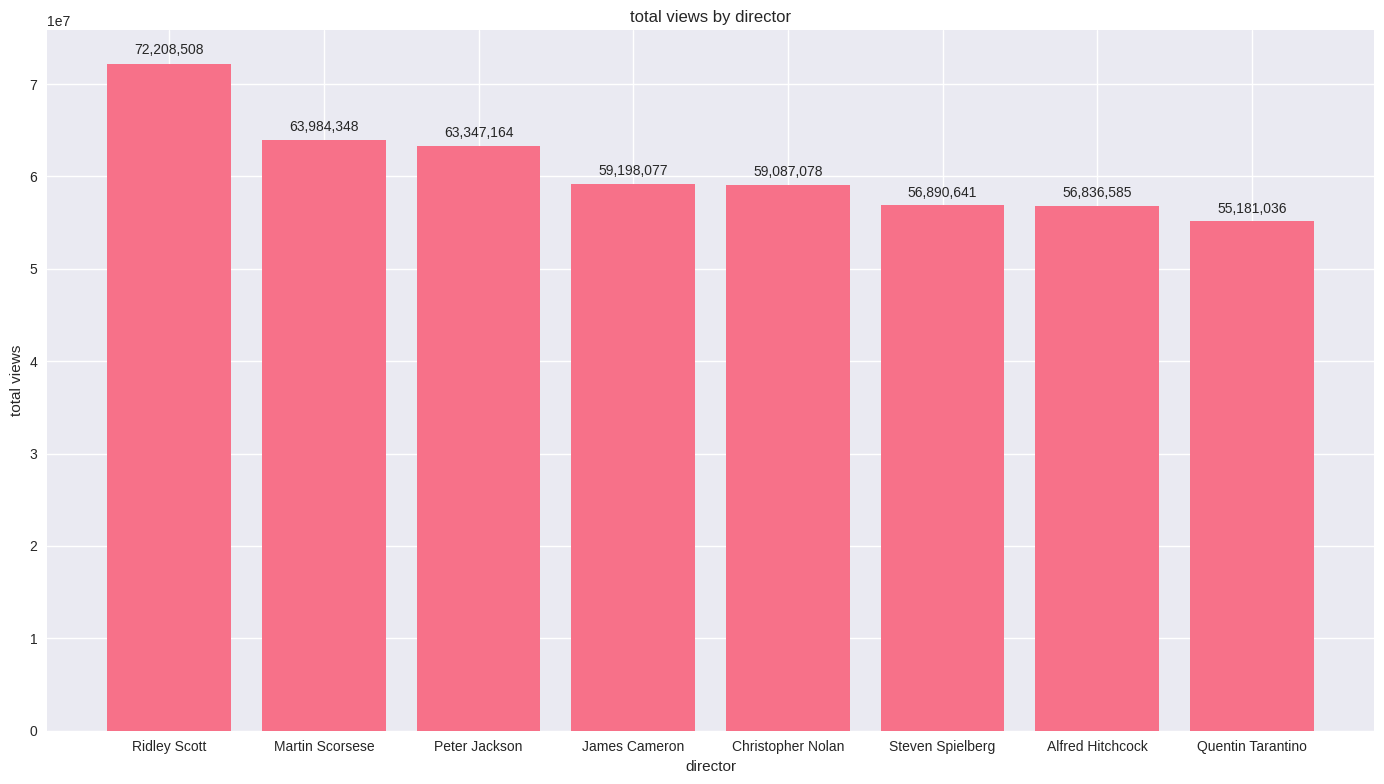

In [12]:
# График 1: Общая выручка авиакомпаний


top_directors = (df.groupby("director_name")["views"].sum().reset_index()
                 .sort_values("views",ascending=False)
                )

plt.figure(figsize=(14, 8))
bars = plt.bar(top_directors["director_name"],top_directors["views"])
plt.title('total views by director')
plt.xlabel('director')
plt.ylabel('total views')

# Добавление значений на столбцы
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


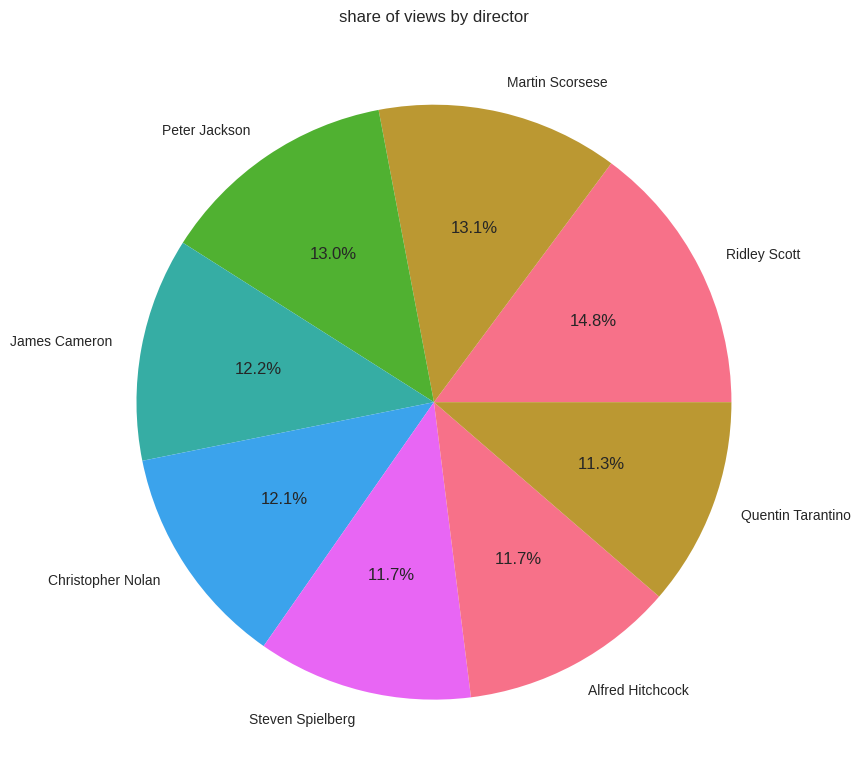

In [13]:
# График 2: Круговая диаграмма доли выручки
plt.figure(figsize=(12, 8))
plt.pie(top_directors["views"],labels=top_directors["director_name"],autopct='%1.1f%%')

plt.title('share of views by director')
plt.tight_layout()
plt.show()


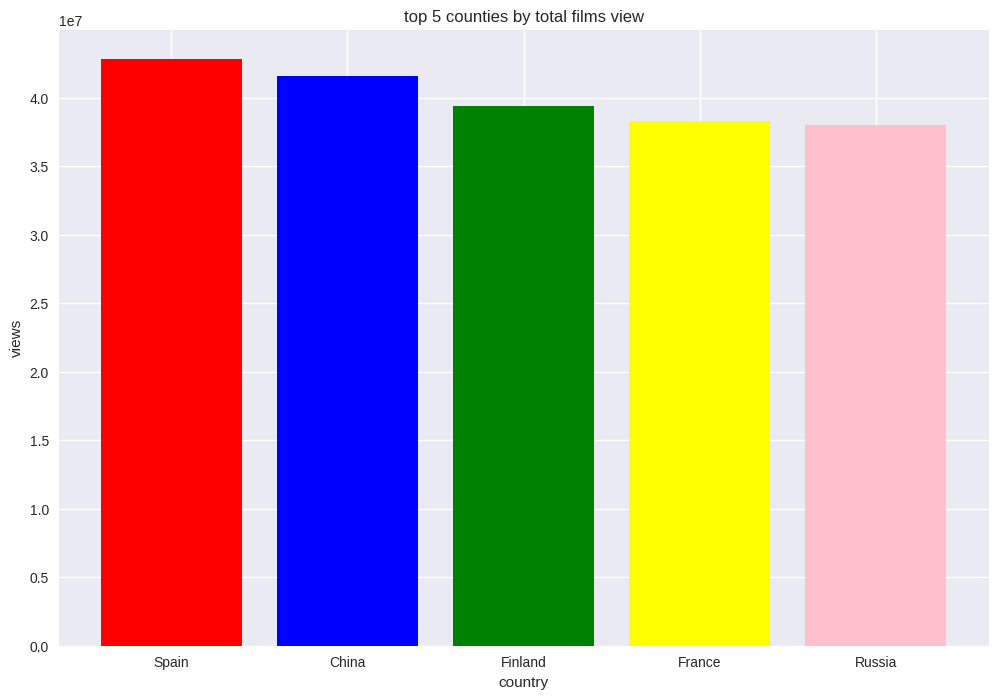

In [16]:
# График 3: Интерактивная визуализация с Plotly

views_country = (df.groupby("country")["views"].sum()
                .reset_index().sort_values("views",ascending=False).head(5))
colors=["red","blue","green","yellow","pink"]

plt.figure(figsize= (12,8))
plt.bar(views_country["country"],views_country["views"],color = colors)
plt.title("top 5 counties by total films view")
plt.xlabel("country")
plt.ylabel("views")
plt.show()

## 4. Выводы и сохранение результатов


In [21]:
# --- Формирование выводов и сохранение результатов ---


director_views = df.groupby("director_name")["views"].sum().sort_values(ascending=False).reset_index()

print("ОСНОВНЫЕ ВЫВОДЫ АНАЛИЗА")
print("=" * 50)

# Лидер по просмотрам
top_director = director_views.loc[0, "director_name"]
top_views = director_views.loc[0, "views"]
total_views = df["views"].sum()


print(f"1. Лидер по просмотрам: {top_director}")
print(f"   - Просмотры: {top_views:,}")


# Общая статистика
print(f"\n2. Общее количество просмотров всех фильмов: {total_views:,}")
print(f"3. Количество режиссёров: {df['director_name'].nunique()}")
print(f"4. Количество фильмов: {df['film_id'].nunique()}")
print(f"5. Среднее количество просмотров на фильм: {df['views'].mean():,.0f}")

# ТОП-3 режиссёра по суммарным просмотрам
print("\n6. ТОП-3 режиссёра по просмотрам:")
for i, row in director_views.head(3).iterrows():
    name = row["director_name"]
    views = row["views"]
    num_films = df[df["director_name"] == name]["film_id"].nunique()
    print(f"   {i+1}. {name}: {views:,} просмотров ")

# Сохранение результатов
df.to_csv('data/df.csv', index=False)

print("\n" + "=" * 50)
print("✓ Результаты сохранены в папке 'data/'")
print("✓ Анализ завершен успешно!")

ОСНОВНЫЕ ВЫВОДЫ АНАЛИЗА
1. Лидер по просмотрам: Ridley Scott
   - Просмотры: 72,208,508

2. Общее количество просмотров всех фильмов: 486,733,437
3. Количество режиссёров: 8
4. Количество фильмов: 1000
5. Среднее количество просмотров на фильм: 486,733

6. ТОП-3 режиссёра по просмотрам:
   1. Ridley Scott: 72,208,508 просмотров 
   2. Martin Scorsese: 63,984,348 просмотров 
   3. Peter Jackson: 63,347,164 просмотров 

✓ Результаты сохранены в папке 'data/'
✓ Анализ завершен успешно!
